In [ ]:
!conda install numpy pandas matplotlib -y

In [ ]:
!conda install -c conda-forge scikit-learn -y

In [ ]:
!conda install seaborn -c conda-forge -y

In [91]:
import numpy as np
import pandas as pd

# Penguins

In this exercise, we will explore the palmerpenguins dataset.


*Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081*

### Part 5.1
Load the data. Impute missing values of the numerical features, for example by replacing them with the mean value for the respective feature.

In [92]:
path = 'data/penguins.csv'

df = pd.read_csv(path, na_values='NA')

numerical_columns = df.select_dtypes(include=['number']).columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.80000,19.80000,207.000000,4000.000000,male,2009
340,341,Chinstrap,Dream,43.50000,18.10000,202.000000,3400.000000,female,2009
341,342,Chinstrap,Dream,49.60000,18.20000,193.000000,3775.000000,male,2009
342,343,Chinstrap,Dream,50.80000,19.00000,210.000000,4100.000000,male,2009


### Part 5.2
Select only the samples belonging to the species Gentoo. Consider the variables ??`flipper_length_mm`, `body_mass_g`, `bill_length_mm`, `bill_depth_mm` and find the corellations between each pair. 

In [93]:
cols = ['flipper_length_mm', 
        'body_mass_g',
        'bill_length_mm', 
        'bill_depth_mm',]
gentoo_df = df[df['species'] == 'Gentoo']

selected_df = gentoo_df[cols]

correlation_matrix = selected_df.corr()

correlation_matrix

,flipper_length_mm,body_mass_g,bill_length_mm,bill_depth_mm
flipper_length_mm,1.000000,0.711209,0.664356,0.632712
body_mass_g,0.711209,1.000000,0.673636,0.666543
bill_length_mm,0.664356,0.673636,1.000000,0.607152
bill_depth_mm,0.632712,0.666543,0.607152,1.000000


Which pair appears to be most highly corellated?

`flipper_length_mm` and `body_mass_g` features appear to be most highly correlated with value of `0.711209`

### Part 5.3 
Fit a linear model predicting `body_mass_g` from  `bill_depth_mm` for the species Gentoo and show the linear parameters.

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = gentoo_df[['bill_depth_mm']]
y = gentoo_df[['body_mass_g']]

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

print(f'Intercept beta_0: {np.round(beta_0, 2)}, Coefficient beta_1: {np.round(beta_1, 2)}, R2-score: {np.round(r2, 2)}')

Intercept beta_0: [-29.72], Coefficient beta_1: [339.92], R2-score: 0.44


What are the linear parameters and how do you judge the goodness of fit?

Linear parameters are coefficients of the linear equation in the context of linear regression.
$$Response = \beta_0 + \beta_1 \cdot Predictor$$
Here, $\beta_0$ is the intercept term and $\beta_1$ is the coefficient for the predictor.
The R2-score is a measure of how well the linear regression model explains the variability in response variable.
$$R^2 = 1 - \frac{RSS}{TSS}$$

R2-score is in [0,1] range. We got 0.44 R2-score which means model explains 44% of the variability in "body_mass_g" based on "bill_depth_mm"

### Part 5.4
Now consider the pair of variables `body_mass_g`  and  `bill_depth_mm` over *all* penguin species. Perform a hypothesis test on whether there is  	statistically significant relationship between the predictors. What problem do you see? *Hint: Consider visualizing the relationship between the variables using a scatterplot.*

Corel_test(body_mass_g,bill_depth_mm)): True
Correlation: -0.471915621186067
P-value: 1.7647813131263706e-20


<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

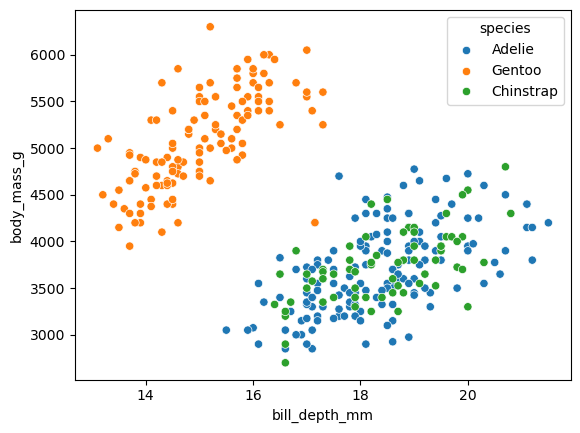

In [95]:
import seaborn as sns
from scipy.stats import pearsonr

x1 = 'body_mass_g'
x2 = 'bill_depth_mm' 
alpha = 0.05

body_mass = df[x1]
bill_depth = df[x2]

correlation, p_value = pearsonr(body_mass, bill_depth)
print(f'Corel_test({x1},{x2})): {None if p_value is None else p_value<alpha}')

print(f'Correlation: {correlation}')
print(f'P-value: {p_value}')

sns.scatterplot(x=x2, y=x1, data=df, hue='species')

Is there a significant relationship and what problem do you see?

Correlation coefficient is -0.471915. Negative value indicates a moderate negative correlation between variables. p-value is 1.76478e-20 which is extremely small. Given very small p-value I would reject null hypothesis and assume it shows strong evidence to suggest that there is a statistically significant negative correlation between "body_mass_g" and "bill_depth_mm" over all penguin species.

However, using the scatterplot I can see as clear as day that as the "bill_depth_mm" grows, so does the "body_mass_g" if I look at species one by one. Therefore, I make assumption that having a correlation coefficient and p-value over whole population is not the brightest idea, since difference species inhibit different relations of their features.

I also would like to mention that "Gentoo" is clearly separated from "Adelie" and "Chinstrap" species. The latter two, however, are linearly inseparable when we look at "body_mass_g" and "bill_depth_mm" scatterplot. However, they might be separable if we use different features.

### Part 5.5 
Consider again the species Gentoo. Suppose we observe a new penguin with bill length of 17. Using the body mass of its four closest neighbors (in terms of the bill lengths), predict the body mass of the new penguin.

In [96]:
from sklearn.neighbors import KNeighborsRegressor
import warnings

warnings.filterwarnings("ignore")

X = gentoo_df[['bill_length_mm']]
y = gentoo_df['body_mass_g']

knn_regressor = KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(X, y)

new_penguin_bill_length = [[17]]
predicted_body_mass = knn_regressor.predict(new_penguin_bill_length)

predicted_body_mass

array([4612.5])

### Part 5.6
Plot the RSS of a $k$NN regression predicting `body_mass_g`  from  `bill_depth_mm` for different choices of $k$ $(k \in \{1, ...,10\})$.

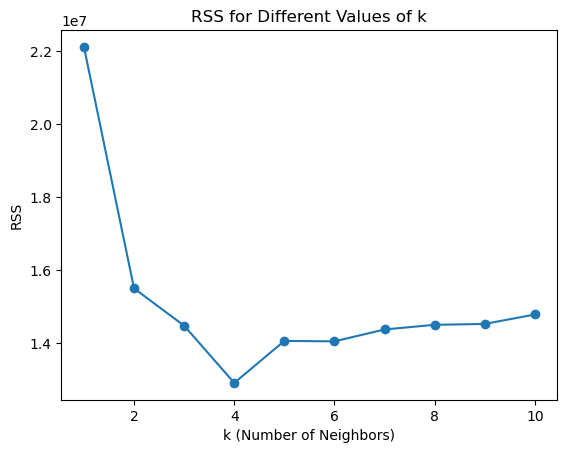

Minimum: 1.29e+07 at position 4


In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

range_k = range(1,11)

X = gentoo_df[['bill_depth_mm']]
y = gentoo_df['body_mass_g']

rss_values = []

for k in range_k:
        knn_regressor = KNeighborsRegressor(n_neighbors=k)
        knn_regressor.fit(X, y)

        y_pred = knn_regressor.predict(X)

        rss = mean_squared_error(y, y_pred) * len(y)
        rss_values.append(rss)

plt.plot(range_k, rss_values, marker='o')
plt.title('RSS for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RSS')
plt.show()

rss_df = pd.DataFrame(rss_values)
min_rss = rss_df.min()
idxmin = rss_df.idxmin()

print(f'Minimum: {format(min_rss[0], ".2e")} at position {idxmin[0] + 1}')

Which $k$ would you choose and why?

I would choose k=4 because it has minimum RSS value equal to 1.29e+07. Minimum RSS means that is the model that provides a good fit to the data. Increasing k gives bigger RSS hence it makes no sense to choose it.